# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [1]:
import pandas as pd
import numpy as np
airbnb = pd.read_csv('~/Downloads/DS3021/airbnb_hw.csv')
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors = 'coerce')
airbnb['Price'] = airbnb['Price'].astype(str).str.replace(',', '').astype(float)
airbnb = airbnb.dropna(subset=['Price'])
airbnb.head(10)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37.0,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28.0,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199.0,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149.0,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250.0,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90.0,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270.0,90.0
9,2339,8/20/2008,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290.0,96.0


In [2]:
missing_price = airbnb['Price'].isnull()
print(f"Missing prices: {missing_price}")

Missing prices: 0        False
1        False
2        False
3        False
4        False
         ...  
30473    False
30474    False
30475    False
30476    False
30477    False
Name: Price, Length: 30297, dtype: bool


In [3]:
police = pd.read_csv('~/Downloads/DS3021/mn_police_use_of_force.csv')
police['subject_injury'].value_counts(dropna=False)

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64

In [4]:
police=police.dropna(subset=['subject_injury'])
police.head(5)

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
9,2016/01/01 02:38:23,Fight,No,DISCON,No,Chemical Irritant,Crowd Control Mace,Black,Male,18.0,commission of crime,1,Downtown West
10,2016/01/01 02:38:23,Fight,No,DISCON,No,Chemical Irritant,Chemical Munitions,Black,Male,18.0,commission of crime,1,Downtown West
11,2016/01/01 02:39:47,Suspicious Person,No,DISCON,Yes,Bodily Force,Body Weight to Pin,Black,Male,21.0,Tensed,5,Lowry Hill East
12,2016/01/01 02:39:47,Suspicious Person,No,DISCON,Yes,Bodily Force,Joint Lock,Black,Male,21.0,Tensed,5,Lowry Hill East
13,2016/01/01 02:39:47,Suspicious Person,No,DISCON,Yes,Bodily Force,Body Weight to Pin,Black,Male,21.0,Tensed,5,Lowry Hill East


In [5]:
subject_force = pd.crosstab(police['subject_injury'], police['force_type'], normalize = 'index')
print(subject_force)

#there are patterns where the bodily force variable has a high percentage for both those injured and not injured.

force_type         Baton  Bodily Force  Chemical Irritant   Firearm  \
subject_injury                                                        
No              0.000000      0.755878           0.090595  0.001383   
Yes             0.001226      0.788473           0.025138  0.000000   

force_type      Gun Point Display  Improvised Weapon  Less Lethal Projectile  \
subject_injury                                                                 
No                       0.022822           0.023513                0.000692   
Yes                      0.026977           0.024525                0.001226   

force_type      Police K9 Bite     Taser  
subject_injury                            
No                    0.001383  0.103734  
Yes                   0.026977  0.105457  


In [6]:
pretrial = pd.read_parquet('~/Downloads/DS3021/justice_data.parquet')
pretrial.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [19]:
pretrial = pretrial.dropna(subset=['ImposedSentenceAllChargeInContactEvent'])
print(pretrial['ImposedSentenceAllChargeInContactEvent'].dtype)
pretrial['ImposedSentenceAllChargeInContactEvent'] = pretrial['ImposedSentenceAllChargeInContactEvent'].str.strip()
pretrial['ImposedSentenceAllChargeInContactEvent'] = pretrial['ImposedSentenceAllChargeInContactEvent'].str.upper()
pretrial['ImposedSentenceAllChargeInContactEvent'] = pretrial['ImposedSentenceAllChargeInContactEvent'].str.replace(r'[^\w\s]', '', regex=True)
#I used these methods to clean up the data and make sure everything matched, I also dropped an na value just incase there were some

object


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [10]:
import pandas as pd
shark = pd.read_excel('~/Downloads/DS3021/GSAF5.xls', engine='xlrd')
shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
shark = shark.dropna(axis = 1, how = 'all')
shark['Year'] = pd.to_numeric(shark['Year'], errors='coerce')
shark = shark[shark['Year'] >= 1940]
range = shark['Year'].describe()
attacks = shark.groupby('Year').size()
print(range)
print(attacks)

count    5458.000000
mean     1991.937156
std        24.083712
min      1940.000000
25%      1969.000000
50%      2000.000000
75%      2013.000000
max      2026.000000
Name: Year, dtype: float64
Year
1940.0     24
1941.0     27
1942.0     41
1943.0     28
1944.0     31
         ... 
2022.0     98
2023.0    109
2024.0     49
2025.0      6
2026.0      1
Length: 87, dtype: int64


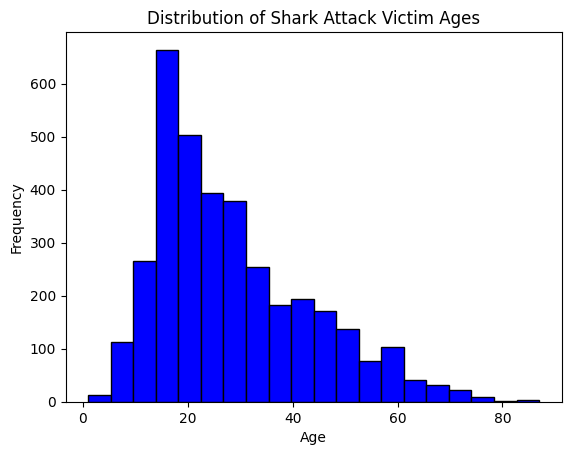

In [12]:
import matplotlib.pyplot as plt
shark['Age'] = pd.to_numeric(shark['Age'], errors='coerce')
shark = shark.dropna(subset=['Age'])
plt.hist(shark['Age'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Shark Attack Victim Ages')
plt.show()

In [13]:
male_attacks = shark['Sex'].value_counts(normalize=True)
prop = male_attacks.get('M', 0)
print(prop)

0.8446271618939609


In [14]:
shark['Type'] = shark['Type'].apply(lambda x: 'Provoked' if 'Provoked' in str(x) else
                                    ('Unprovoked' if 'Unprovoked' in str(x) else 'Unknown'))
unprovoked = shark['Type'].value_counts(normalize=True)
unprovoked_prop = unprovoked.get('Unprovoked', 0)
print(unprovoked_prop)

0.831132340545097


In [15]:
shark['Fatal Y/N'] = shark['Fatal Y/N'].apply(lambda x: 'Y' if 'Y' in str(x) else
                                    ('N' if 'N' in str(x) else 'Unknown'))

In [16]:
unpro_by_sex = shark[shark['Type'] == 'Unprovoked'].groupby('Sex').size()

# Check if unprovoked attacks are more or less likely to be fatal
fatal_unpro = shark[(shark['Type'] == 'Unprovoked') & (shark['Fatal Y/N'] == 'Y')].shape[0]
total_unpro = shark[shark['Type'] == 'Unprovoked'].shape[0]
fatal_unprovoked_proportion = fatal_unpro / total_unpro

# Is the attack more or less likely to be fatal when the victim is male or female?
fatal_by_sex = shark.groupby(['Sex', 'Fatal Y/N']).size().unstack().fillna(0)

print(f"unprovoked attacks by sex: {unpro_by_sex}")
print(f"prop of fatal unprovoked attacks: {fatal_unprovoked_proportion}")
print(f"fatal by sex: {fatal_by_sex}")

unprovoked attacks by sex: Sex
 M        1
F       476
M      2457
M         1
lli       1
dtype: int64
prop of fatal unprovoked attacks: 0.162947937795808
fatal by sex: Fatal Y/N       N  Unknown      Y
Sex                              
 M            1.0      0.0    0.0
F           438.0     34.0   73.0
M          2370.0    171.0  438.0
M             1.0      0.0    0.0
lli           1.0      0.0    0.0


In [17]:
shark.columns = shark.columns.str.strip()
whiteshark = shark['Species'].str.contains('White Shark', case=False, na=False)
white_prop = whiteshark.sum()/len(shark)
print(white_prop)

0.12559707783085136


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper is about tidy datasets, their specific structure, the advantages to them, and how they aid in manipulating or cleaning uo data in general to make it easier to process and read. 
2. It was designed to "facilitate initial exploration and analysis of the data" aiming to simplify the tools used in the development of data analysis.
3. The first sentence means that each dataset may need to be cleaned in a different way because no two datasets are exactly alike. But tidy data sets provided a standardized way of linking structure and semantics. This sentence means that variables and observations are subjective to the data being presented. For example, height and weight could be their own variables, or in another case, could be observations under a 'measurement' variable.
4. Values are the overarching idea and can be split in 2 ways, variables and observations. Variables are values that are measured all under the same attribute. Observations contain variables all measured on the same unit.
5. Tidy data is "the standard way of mapping the meaning of a dataset to its structure".
6. The five most common problems are that column headers are values not variable, there are multiple variables stored in one column, variables are stored in both rows and columns, there are multiple types of observational units, and that a single observational unit is stored in multiple tables. Table 4 is messy because the variable form for the rows and columns are values. A melting dataset is one where its rows/columns are in the process of being converted to tidy it up.
7. Table 12 is tidy/molten because missing values have been dropped and all the data that goes together has been aligned by column with the data associated with each other spread across the row, increasing readability.
8. The chicken-egg problem is that the tools used for tidy data are inextricably linked to tidy data so reform and improvement of the tools has to work hand in hand with data begging the question of what came first, the tidy data, or the tools used to tidy the data, since they are always working in tandem. Wickham hopes that people will build on the framework of tidy data to develop better storage strategies and tools.


**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?